# Avaliação Intermediária - NLP

### Feito por: 
- Henrique Martinelli Frezzatti

### Dataset obtained from:
- https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset?select=yelp_academic_dataset_review.json (yelp_academic_dataset_review.json)

Primeiramente, é necessário importar as bibliotecas que serão utilizadas no código, realizar os downloads das dependências e, também, realizar a criação de uma função para rodar uma parcela do dataset original, visto que o original possui mais de 5GB de tamanho.

In [1]:
import pandas as pd
import random
import json
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
file_path = 'yelp_academic_dataset_review.json'

def load_sample_json_to_df(file_path, fraction=0.1, seed=42):
    data = []
    random.seed(seed)  # Definir seed para reprodutibilidade
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if random.random() < fraction:  # Seleciona 1/10 aleatoriamente
                data.append(json.loads(line))
    return pd.DataFrame(data)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to C:\Users\Henrique
[nltk_data]     Martinelli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Henrique
[nltk_data]     Martinelli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Henrique
[nltk_data]     Martinelli\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Feito isso, será carregado o arquivo em um DataFrame e serão mostrados quantos dados foram carregados.

In [2]:
df = load_sample_json_to_df(file_path, fraction=0.01)
print(f"Total de reviews carregados: {len(df)}")

Total de reviews carregados: 69435


In [3]:
df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5.0,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27
1,e4H9r1BSvBGAVQ-HvelnhA,1wN_Q-1fg46ZomOzf2tg5w,6p07zfmJWvytr0paqpyvbg,1.0,1,0,0,Worst place I've ever visited. The bouncer was...,2017-10-11 03:53:10
2,Mjbwb8HzZvq1m-0-PH0SJw,uBb5_DPYAXPYXvs9uhmGzg,tzVLTQNUtiCAxUZmEuF0vQ,3.0,0,0,0,Very cozy place to have a drink with friends. ...,2015-04-01 17:53:49
3,2_NKFcHlU7MAeWeGksTLKg,BBTexIhkFIYnS0rd56vsKQ,W4ZEKkva9HpAdZG88juwyQ,5.0,0,0,0,OMG! What an amazing dinner experience. A frie...,2017-10-24 22:39:51
4,AFBxqbyqu_rWk9Ax_-zesg,d0FbFaZuJWfai0RYsUS7qw,N9-NRK8PPvi73tduxoPKbA,3.0,1,1,0,By far some of the most comfy theater recliner...,2017-06-17 20:08:16
...,...,...,...,...,...,...,...,...,...
69430,swiUO8PqTOFkKEqdxXXIEg,pOlzxPM9aToS15yV9Cl6tQ,5gIfmupQTP3Lk4wIgNfoEQ,3.0,1,0,0,Tried this place out for the first time. Servi...,2018-08-12 17:16:31
69431,c25LzZf8m7IVxcEd1b8CkA,EqSWxn6_7hADuUU9hd0qkQ,oo0Jvm-p5fpDiaUAWkuqeg,1.0,0,0,0,Staff not friendly and service added without a...,2021-12-11 00:05:53
69432,mb8LuP_VHXMzu3Z-iS47dg,GEjwnX0gS5BpWjZ5rcM2FA,lRCA11IAq1VZqKIJCY8VBQ,5.0,4,1,3,"Oh my, I'm officially on the Thai food train a...",2018-06-22 21:16:31
69433,S59qJdMRHiHMGqkBALCilg,S5RnOLjZOkEJXGhjR_EliQ,9xdXS7jtWjCVzL4_oPGv9A,5.0,0,0,0,My husband and I had an incredible meal/experi...,2021-12-01 03:55:51


Abaixo, será realizado uma limpeza do dataframe, removendo colunas desnecessárias. 

In [4]:
df.drop(columns=['review_id', 'user_id', 'business_id'], inplace=True)
df.head()

,stars,useful,funny,cool,text,date
0,5.0,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27
1,1.0,1,0,0,Worst place I've ever visited. The bouncer was...,2017-10-11 03:53:10
2,3.0,0,0,0,Very cozy place to have a drink with friends. ...,2015-04-01 17:53:49
3,5.0,0,0,0,OMG! What an amazing dinner experience. A frie...,2017-10-24 22:39:51
4,3.0,1,1,0,By far some of the most comfy theater recliner...,2017-06-17 20:08:16


Agora, será utilizado o Lemmatizer para reduzir as palavras às suas formas base ou lemmas, preservando o significado sem perder informações gramaticais. Diferente do stemming, que apenas remove sufixos de maneira mais simplificada, a lemmatização leva em conta o contexto da palavra, permitindo que palavras derivadas, como verbos conjugados ou palavras no plural, sejam reduzidas à sua forma raiz de maneira mais precisa.

In [5]:
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = word_tokenize(text.lower())
    words = [lemmatizer.lemmatize(word) for word in words if word.isalpha()]
    return ' '.join(words)

df['text_clean'] = df['text'].apply(clean_text)
df.head()

,stars,useful,funny,cool,text,date,text_clean
0,5.0,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,my absolute favorite cafe in the city their bl...
1,1.0,1,0,0,Worst place I've ever visited. The bouncer was...,2017-10-11 03:53:10,worst place ive ever visited the bouncer wa ru...
2,3.0,0,0,0,Very cozy place to have a drink with friends. ...,2015-04-01 17:53:49,very cozy place to have a drink with friend th...
3,5.0,0,0,0,OMG! What an amazing dinner experience. A frie...,2017-10-24 22:39:51,omg what an amazing dinner experience a friend...
4,3.0,1,1,0,By far some of the most comfy theater recliner...,2017-06-17 20:08:16,by far some of the most comfy theater recliner...


Separando em treino e teste, além da coluna que será utilizada para classificar (Y) e a coluna que será classificada (X).

In [6]:
X = df['text_clean']
y = df['stars'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Agora, utilizando a técnica de Bag of Words (BoW), o dataset será transformado em uma representação numérica onde cada review será convertido em um vetor de frequências de palavras. Isso permitirá que os modelos de machine learning possam processar os dados textuais e aprender padrões baseados nas ocorrências de palavras, ignorando a ordem delas.

In [7]:
# Vetorização do texto (Bag of Words)
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

Definindo os modelos que serão utilizados para os treinamentos, aplicaremos técnicas de machine learning como Logistic Regression, K-Nearest Neighbors (KNN) e Random Forest. Esses modelos serão testados e avaliados por meio de validação cruzada (cross-validation), que consiste em dividir o dataset em várias partes (ou folds), onde em cada iteração o modelo é treinado em uma parte e testado na outra.

In [8]:
# Lista de modelos a serem testados
model_names = ['Logistic Regression', 'KNN', 'Random Forest']
models = [
    LogisticRegression(solver='liblinear', max_iter=1000),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=42)  
]

# Dicionário para armazenar as acurácias
accuracies = {}

# Avaliação dos modelos com validação cruzada
for model_name, model in zip(model_names, models):
    print(f"\n--- Avaliando {model_name} ---")
    
    # Cross-validation
    scores = cross_val_score(model, vectorizer.transform(X), y, cv=3, scoring='balanced_accuracy')
    
    # Armazenar os scores
    accuracies[model_name] = scores
    print(f"Balanced Accuracy for {model_name} (CV): {scores.mean()} ± {scores.std()}")


--- Avaliando Logistic Regression ---
Balanced Accuracy for Logistic Regression (CV): 0.5115660624594286 ± 0.0013471885875160911

--- Avaliando KNN ---
Balanced Accuracy for KNN (CV): 0.30698468268184864 ± 0.0007630020876805453

--- Avaliando Random Forest ---
Balanced Accuracy for Random Forest (CV): 0.3840729661742663 ± 0.0021713079734676697


Apesar de não possuir uma acurácia muito alta, o melhor modelo, como pode ser identificado acima, foi a Regressão Logística, com um score aproximado de 0.51. 

Abaixo, há representações gráficas que ilustram a média das acurácias obtidas para cada modelo, acompanhadas de barras de erro que representam o desvio padrão das acurácias em relação às iterações de validação cruzada

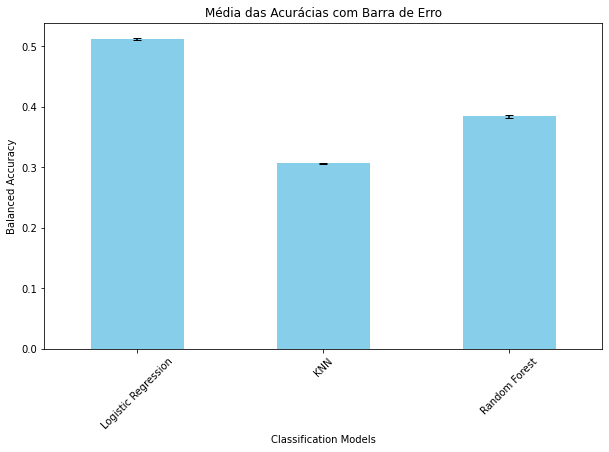

In [20]:
# Calcula a média e o desvio padrão das acurácias
mean_accuracies = scores_df.mean()
std_accuracies = scores_df.std()

# Plotando o gráfico de barras com barra de erro
plt.figure(figsize=(10, 6))
mean_accuracies.plot(kind='bar', yerr=std_accuracies, capsize=4, color='skyblue')
plt.title('Média das Acurácias com Barra de Erro')
plt.ylabel('Balanced Accuracy')
plt.xlabel('Classification Models')
plt.xticks(rotation=45)
plt.show()

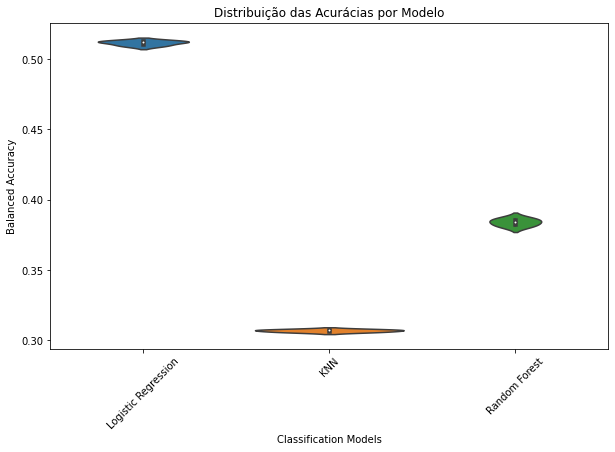

In [11]:
import seaborn as sns

# Convertendo para um formato adequado para o gráfico de violino
scores_melted = pd.melt(scores_df, var_name='Model', value_name='Accuracy')

# Plotando o gráfico de violino
plt.figure(figsize=(10, 6))
sns.violinplot(x='Model', y='Accuracy', data=scores_melted)
plt.title('Distribuição das Acurácias por Modelo')
plt.ylabel('Balanced Accuracy')
plt.xlabel('Classification Models')
plt.xticks(rotation=45)
plt.show()

Agora, haverá o treinamento com cada um dos modelos separadamente para poder identificar as palavras que foram selecionadas como mais importantes para a classificação em cada modelo, seja para um extremo ou outro.

In [16]:
# Obter as palavras mais importantes após o treinamento
for model_name, model in zip(model_names, models):
    # Treinando o modelo completo para obter as palavras mais importantes
    model.fit(X_train_bow, y_train)
    
    # Obter as palavras mais importantes
    feature_names = vectorizer.get_feature_names_out()
    print(f"\nTop palavras para {model_name}:")

    if hasattr(model, "coef_"):
        # Para modelos lineares como Logistic Regression
        coefficients = model.coef_[0]
        important_words = sorted(zip(coefficients, feature_names), key=lambda x: abs(x[0]), reverse=True)[:10]
        for coef, word in important_words:
            print(f"{word}: {coef:.4f}")
    
    elif hasattr(model, "feature_importances_"):
        # Para modelos baseados em árvores como Random Forest
        importances = model.feature_importances_
        important_words = sorted(zip(importances, feature_names), key=lambda x: x[0], reverse=True)[:10]
        for importance, word in important_words:
            print(f"{word}: {importance:.4f}")
    
    print("\n")


Top palavras para Logistic Regression:
neat: -2.3688
poisoning: 2.1538
perfection: -2.1466
scam: 2.0400
worst: 1.9827
importantly: -1.9784
dream: -1.9055
ghetto: 1.8507
awesome: -1.7991
golden: -1.7919



Top palavras para KNN:



Top palavras para Random Forest:
not: 0.0114
but: 0.0107
great: 0.0081
good: 0.0081
the: 0.0073
and: 0.0071
amazing: 0.0066
wa: 0.0062
to: 0.0061
it: 0.0057




Realizando downsizing para testar a acurácia de cada modelo com diferentes tamanhos do dataset de treino.

In [18]:
# Tamanhos para testar (e.g., 10%, 25%, 50%, 75%)
dataset_sizes = [0.1, 0.25, 0.5, 0.75]
results = {}

for size in dataset_sizes:
    # Reduzindo o dataset
    X_train_sample, _, y_train_sample, _ = train_test_split(X_train_bow, y_train, train_size=size, stratify=y_train)
    
    # Re-treine e avalie os modelos com o dataset reduzido
    for model_name, model in zip(model_names, models):
        model.fit(X_train_sample, y_train_sample)
        
        # Avaliar no dataset de teste
        y_pred = model.predict(X_test_bow)
        acc = balanced_accuracy_score(y_test, y_pred)
        
        # Armazenar resultados
        results[(model_name, size)] = acc
        print(f"Accuracy for {model_name} with {size*100}% of the data: {acc:.4f}")


Accuracy for Logistic Regression with 10.0% of the data: 0.4747
Accuracy for KNN with 10.0% of the data: 0.2878
Accuracy for Random Forest with 10.0% of the data: 0.3408
Accuracy for Logistic Regression with 25.0% of the data: 0.4958
Accuracy for KNN with 25.0% of the data: 0.2965
Accuracy for Random Forest with 25.0% of the data: 0.3624
Accuracy for Logistic Regression with 50.0% of the data: 0.5004
Accuracy for KNN with 50.0% of the data: 0.2990
Accuracy for Random Forest with 50.0% of the data: 0.3827
Accuracy for Logistic Regression with 75.0% of the data: 0.5099
Accuracy for KNN with 75.0% of the data: 0.3062
Accuracy for Random Forest with 75.0% of the data: 0.3860


Utilizando o Latent Dirichlet Allocation (LDA) para modelagem de tópicos, temos a oportunidade de explorar as relações intrínsecas dentro do conjunto de dados. O LDA é uma técnica de aprendizado não supervisionado que permite identificar tópicos ocultos em um corpus de documentos, ao assumir que cada documento é uma mistura de tópicos e que cada tópico é caracterizado por uma distribuição de palavras.

In [19]:
from sklearn.decomposition import LatentDirichletAllocation

# Aplicar LDA para identificar tópicos
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
X_topics = lda.fit_transform(X_train_bow)

# Exibir as palavras mais relevantes para cada tópico
n_top_words = 10
topic_words = lda.components_

print("\nTop palavras por tópico:")
for topic_idx, topic in enumerate(topic_words):
    print(f"Tópico {topic_idx}: {' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-n_top_words - 1:-1]])}")



Top palavras por tópico:
Tópico 0: the is and to you of in it are they
Tópico 1: the and wa it of to with we for had
Tópico 2: the to and wa my it that for they of
Tópico 3: the and to of wa it in we for on
Tópico 4: and the to is wa food great for we service
